# **Лабораторная работа №3**
## **Бинарная классификация**
## **Вариант 4: Прогнозирование рака**
**Цель работы**: познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регрессии).

Выполним анализ набора данных: "Прогнозирование рака". Набор данных содержит описание медицинской статистики и образа жизни 1500 пациентов. Разработан для прогнозирования наличия рака на основе различных при- знаков. Набор данных структурирован для предоставления реалистичной задачи для предиктивного моделирования в медицинской области. Набор данных включает следующие атрибуты:
*   Age – целые числа, представляющие возраст пациента, в диапазоне от 20 до
80 лет;
*   Gender – двоичные значения, представляющие пол, где 0 обозначает мужской
пол, а 1 обозначает женский пол;
*   BMI (ИМТ) – непрерывные значения, представляющие индекс массы тела, в
диапазоне от 15 до 40;
*   Smoking – двоичные значения, указывающие на статус курения, где 0 означает
«нет», а 1 означает «да»;
*   GeneticRisk – категориальные значения, представляющие уровни генетического риска развития рака, где 0 обозначает низкий уровень, 1 обозначает средний
уровень и 2 обозначает высокий уровень;
*   PhysicalActivity – непрерывные значения, представляющие количество часов
в неделю, потраченных на физическую активность, в диапазоне от 0 до 10;
*   AlcoholIntake – непрерывные значения, представляющие количество единиц
алкоголя, потребляемых в неделю, в диапазоне от 0 до 5;
*   CancerHistory – двоичные значения, указывающие, есть ли у пациента онкологические заболевания в анамнезе, где 0 означает «нет», а 1 означает «да»;
*   Diagnosis – двоичные значения, указывающие на статус диагноза рака, где 0
означает отсутствие рака, а 1 означает наличие рака (целевая переменная).



## 1. Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("cancer_data.csv")
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


## Импортируем необходимые библиотеки

In [ ]:
# Выведем целевую переменную, целевые имена и частоту каждого уникального значения:
(unique, counts) = np.unique(df['Diagnosis'], return_counts=True)
print('Unique values of the target variable: ', unique)
print('Counts of the target variable:' , counts)

Unique values of the target variable:  [0 1]
Counts of the target variable: [943 557]


<Axes: xlabel='Diagnosis', ylabel='count'>

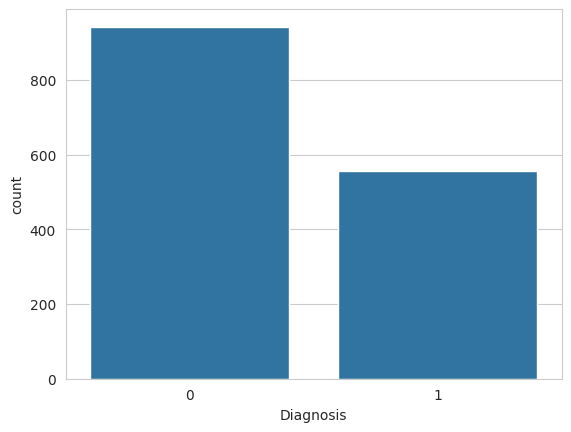

In [ ]:
# Построим столбчатую диаграмму, чтобы увидеть целевую переменную:
sns.set_style("whitegrid")
sns.countplot(df, x = 'Diagnosis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


## Проверяем наличие пропущенных значений и выбросов

In [ ]:
# проверяем на пропущенные значения
print(df.isnull().sum())

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


<Axes: xlabel='Age'>

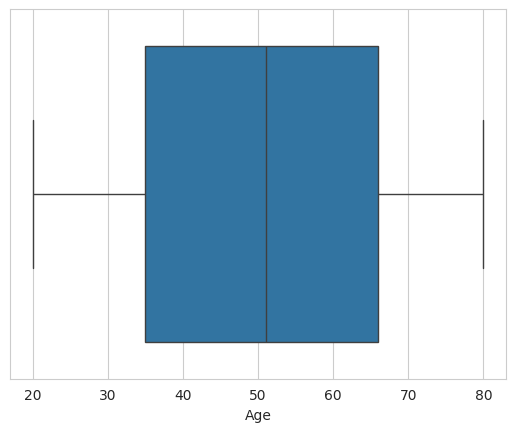

In [ ]:
# проверяем на выбросы
sns.boxplot(x=df['Age'])

## Исключим невлияющие категориальные признаки

In [ ]:
df_copy = df.copy()
cat_feat = ['Gender', 'PhysicalActivity']
df_copy.drop(cat_feat, axis = 1, inplace = True)
df_copy.head()

,Age,BMI,Smoking,GeneticRisk,AlcoholIntake,CancerHistory,Diagnosis
0,58,16.085313,0,1,4.148219,1,1
1,71,30.828784,0,1,3.519683,0,0
2,48,38.785084,0,2,4.728368,0,1
3,34,30.040296,0,0,2.044636,0,0
4,62,35.479721,0,0,3.309849,0,1


## Разделяем данные на признаки и целевую переменную

In [ ]:
y = df_copy['Diagnosis']
X = df_copy.drop('Diagnosis', axis = 1)
X

,Age,BMI,Smoking,GeneticRisk,AlcoholIntake,CancerHistory
0,58,16.085313,0,1,4.148219,1
1,71,30.828784,0,1,3.519683,0
2,48,38.785084,0,2,4.728368,0
3,34,30.040296,0,0,2.044636,0
4,62,35.479721,0,0,3.309849,0
...,...,...,...,...,...,...
1495,62,25.090025,0,0,1.284158,0
1496,31,33.447125,0,1,2.280636,1
1497,63,32.613861,1,1,0.150101,0
1498,55,25.568216,0,0,1.986138,1


## Применяем операцию нормализации для численной устойчивости

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
X

array([[ 0.43549546, -1.58116185, -0.60713519,  0.72396612,  1.21946526,
         2.43812314],
       [ 1.17266226,  0.45872244, -0.60713519,  0.72396612,  0.77647404,
        -0.41015156],
       [-0.13155592,  1.55954393, -0.60713519,  2.19743855,  1.62835335,
        -0.41015156],
       ...,
       [ 0.71902115,  0.70570289,  1.64707962,  0.72396612, -1.59840354,
        -0.41015156],
       [ 0.26538005, -0.26912183, -0.60713519, -0.74950631, -0.30436716,
         2.43812314],
       [ 0.9458417 , -0.5327102 , -0.60713519, -0.74950631,  0.30913374,
         2.43812314]])

## Разделяем данные на тренировочный и тестовый наборы

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

## Обучаем модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Делаем прогноз на основе данных тестирования

In [ ]:
y_pred = model.predict(X_test)

## Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP) =  99
False Positive(FP) =  34
True Negative(TN) =  202
False Negative(FN) =  40
Accuracy of the binary classification = 0.803


In [ ]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8026666666666666


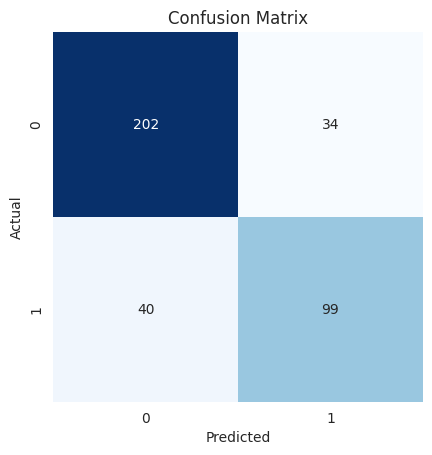

In [ ]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.80


In [ ]:
from sklearn.metrics import  precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")

Точность: 0.74
Полнота: 0.71


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")

F1-мера: 0.73


In [ ]:
df_copy.corr()

,Age,BMI,Smoking,GeneticRisk,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.030246,-0.013914,-0.027025,0.003209,-0.010996,0.196603
BMI,0.030246,1.000000,-0.012616,0.011392,0.004711,-0.010824,0.187560
Smoking,-0.013914,-0.012616,1.000000,-0.021039,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,0.011392,-0.021039,1.000000,-0.016864,-0.010833,0.253472
AlcoholIntake,0.003209,0.004711,-0.001660,-0.016864,1.000000,0.055403,0.212772
CancerHistory,-0.010996,-0.010824,0.016368,-0.010833,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.187560,0.226999,0.253472,0.212772,0.392188,1.000000


## Строим ROC-кривую

In [ ]:
from sklearn.metrics import roc_curve, auc
# Получаем предсказание вероятности для класса 1
y_score = model.predict_proba(X_test)[:, 1]
# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# (Опционально) Рассчитываем AUC (Area Under Curve) - площадь  под кривой
roc_auc = auc(fpr, tpr)

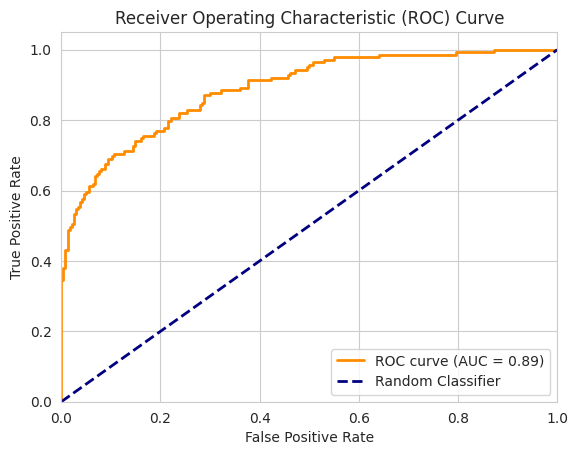

In [ ]:
## Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()